# Email Spam Detection using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [4]:
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

In [5]:
cv = CountVectorizer()
X = cv.fit_transform(df['message'])
y = df['label_num']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97847533632287

Confusion Matrix:
 [[952  13]
 [ 11 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [9]:
sample = ["Congratulations! You’ve won a free iPhone. Click here to claim."]
sample_transformed = cv.transform(sample)
model.predict(sample_transformed)

array([1])

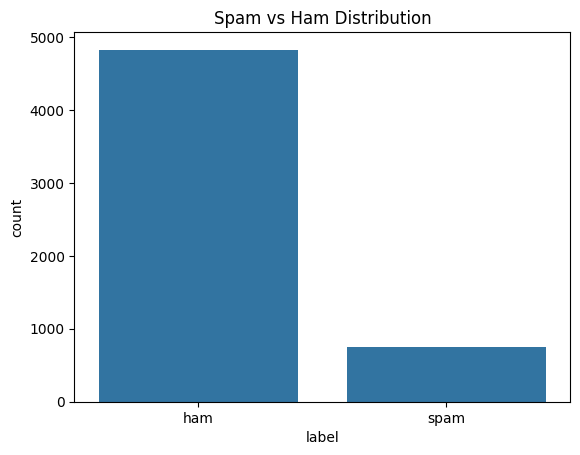

In [10]:
sns.countplot(x='label', data=df)
plt.title("Spam vs Ham Distribution")
plt.show()

## Conclusion: Naive Bayes is a powerful classifier for spam detection!